# QUESTION and VALUE BEHIND RESEARCH

#### Research Question:

How does age group shape experiences of isolation, and what role do demographic and social factors play in moderating these experiences?

#### Study Objectives:

Analyze the relationship between age group and isolation, as measured on the UCLA loneliness scale.
Explore whether levels of social interaction amplify or buffer loneliness trends within specific age groups.
Variables to Explore:

DEMO_age: Grouped into meaningful age brackets (e.g., 18–29, 30–49, 50–64, 65+).
LONELY_ucla_loneliness_scale_isolated: A validated scale for measuring perceived isolation (dependent variable).
LIFESTYLE_time_use_balance_family: To examine individual's perceived family times and notice any trends

#### Visual Exploration:

Use bar graphs and KDE models to visualize the distribution of isolation scores by age group.

#### Statistical Testing:

Perform hypohtesis tests using chi-square method to support claims and provide evidence


#### Trend Observation:

Explore age-specific patterns, e.g., do younger or older individuals report more isolation?
Investigate whether time spent with family correlates with age

#### Potential Insights:

Does loneliness peak in particular life stages (e.g., early adulthood, midlife, or old age)?
Can high levels of social interaction effectively reduce loneliness in age groups where it is most prevalent?

# SIMPLE BAR GRAPH

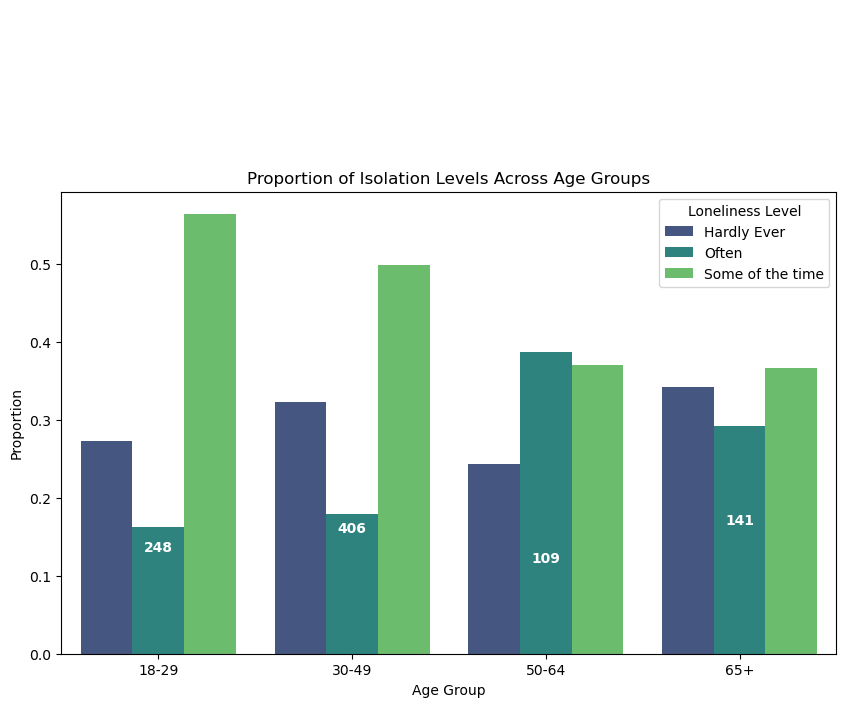

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and clean data
data = pd.read_csv('https://raw.githubusercontent.com/pointOfive/stat130chat130/refs/heads/main/CP/CSCS_data_anon.csv', low_memory=False)

# Drop rows with missing values for age or loneliness level
data = data.dropna(subset=['DEMO_age', 'LONELY_ucla_loneliness_scale_isolated'])

# Step 1: Filter out 'presented but no response' data
data = data[data['LONELY_ucla_loneliness_scale_isolated'] != 'Presented but no response']

# Step 2: Define age brackets
bins = [18, 29, 49, 64, 100]  # Adjust as needed
labels = ['18-29', '30-49', '50-64', '65+']
data['age_group'] = pd.cut(data['DEMO_age'], bins=bins, labels=labels, right=False)

# Step 3: Count loneliness levels per age group
grouped_data = data.groupby(['age_group', 'LONELY_ucla_loneliness_scale_isolated'], observed=False).size().reset_index(name='count')

# Step 4: Normalize counts within each age group for proportions
grouped_data['proportion'] = grouped_data.groupby('age_group', observed=False)['count'].transform(lambda x: x / x.sum())

# Step 5: Create proportional bar chart
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=grouped_data,
    x='age_group',
    y='proportion',
    hue='LONELY_ucla_loneliness_scale_isolated',
    palette='viridis'
)

# Annotate each bar segment with the count
for age_group in grouped_data['age_group'].unique():
    age_data = grouped_data[grouped_data['age_group'] == age_group]
    cumulative_height = 0  # Initialize cumulative height for stacking
    for _, row in age_data.iterrows():
        height = row['proportion']
        count = row['count']
        if height > 0:  # Only annotate if there is a segment
            plt.text(
                x=labels.index(age_group), 
                y=cumulative_height + height / 2,  # Position in the middle of the segment
                s=f"{count}", 
                ha='center', 
                va='center', 
                color='white', 
                fontweight='bold'
            )
            cumulative_height += height  # Update cumulative height for next segment

# Add titles and labels
plt.title('Proportion of Isolation Levels Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.legend(title='Loneliness Level', loc='upper right')

# Save and show the plot
plt.savefig("isolation_across_groups_annotated.png")
plt.show()


#### CALULATING P-VALUE USING CHI-SQUARE

In [39]:
import scipy.stats as stats

# Step 1: Create a contingency table for the age groups and loneliness categories
contingency_table = pd.crosstab(data['age_group'], data['LONELY_ucla_loneliness_scale_isolated'])

# Step 2: Perform Chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Step 3: Print the p-value and test results
print(f"Chi-square statistic: {chi2_stat}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies: \n{expected}")
print(f"P-value: {p_value}")


Chi-square statistic: 102.71852199130043
Degrees of freedom: 9
Expected frequencies: 
[[210.98031865 132.41049672   4.38238051 320.22680412]
 [293.09840675 183.9475164    6.08809747 444.86597938]
 [ 87.8031865   55.1049672    1.82380506 133.26804124]
 [ 82.1180881   51.53701968   1.70571696 124.63917526]]
P-value: 4.430933702534926e-18


We can reject null hypothesis, meaning that there is a statistically significant relationship between the age group and the proportion of people reporting "often" feeling lonely.

Alternative hypothesis: meaning there isn't enough evidence to suggest a significant relationship.


Explanation:

Contingency table: pd.crosstab(data['age_group'], data['LONELY_ucla_loneliness_scale_isolated']) creates a table that shows the frequency distribution of loneliness categories across different age groups.

Chi-square test: stats.chi2_contingency(contingency_table) performs the Chi-square test on the contingency table. It returns the test statistic (chi2_stat), the p-value (p_value), the degrees of freedom (dof), and the expected frequencies (expected).

Interpretation:
If the p-value is less than 0.05, you can reject the null hypothesis and conclude that there is a statistically significant relationship between the age group and the proportion of people reporting "often" feeling lonely.

If the p-value is greater than 0.05, you fail to reject the null hypothesis, meaning there isn't enough evidence to suggest a significant relationship.

### DO OLDER INDIVIDUALS FEEL LIKE THEY SPEND LESS TIME WITH FAMILY?

/tmp/ipykernel_53/4027559284.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['age_group'] = age_groups
/tmp/ipykernel_53/4027559284.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(too_little_data['DEMO_age'], shade=True, label='Too Little Family Time', color='blue')
/tmp/ipykernel_53/4027559284.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(adequate_data['DEMO_age'], shade=True, label='Adequate Family Time', color='green')


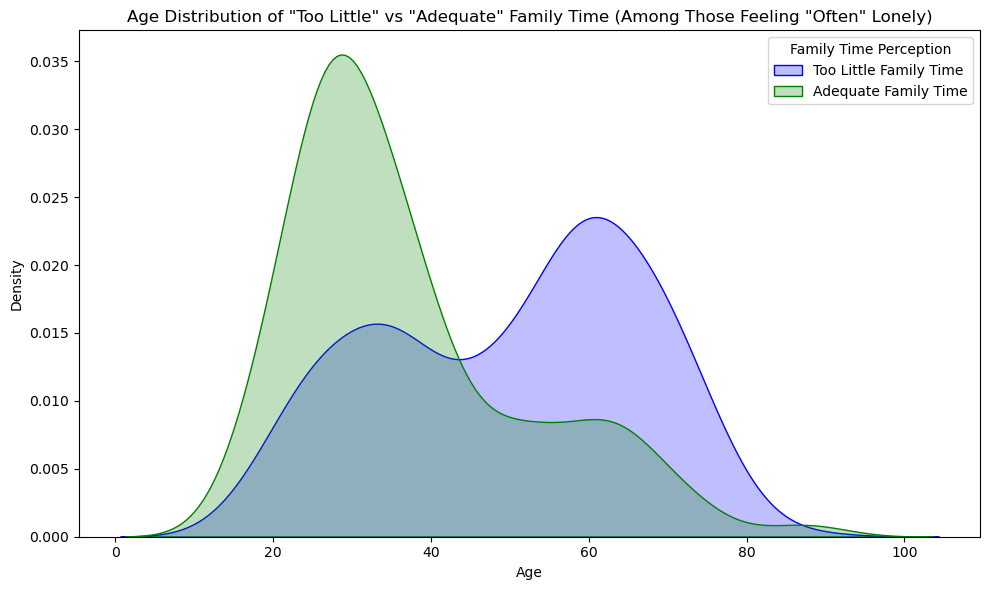

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and clean the data
data = pd.read_csv('https://raw.githubusercontent.com/pointOfive/stat130chat130/refs/heads/main/CP/CSCS_data_anon.csv', low_memory=False)

# Drop rows with missing values in the relevant columns
data = data.dropna(subset=['DEMO_age', 'LIFESTYLE_time_use_balance_family', 'LONELY_ucla_loneliness_scale_isolated'])

# Filter for those who feel lonely "often"
filtered_data = data[data['LONELY_ucla_loneliness_scale_isolated'] == 'Often']

# Create a new column for age groups
age_groups = pd.cut(filtered_data['DEMO_age'], bins=[18, 29, 49, 64, 100], labels=['18-29', '30-49', '50-64', '65+'])
filtered_data['age_group'] = age_groups

# Filter the data into two categories: "Too Little" and "Adequate" family time
too_little_data = filtered_data[filtered_data['LIFESTYLE_time_use_balance_family'] == 'Too little']
adequate_data = filtered_data[filtered_data['LIFESTYLE_time_use_balance_family'] != 'Too little']

# Plot KDE for age distribution for both categories (Too Little vs Adequate Family Time)
plt.figure(figsize=(10, 6))
sns.kdeplot(too_little_data['DEMO_age'], shade=True, label='Too Little Family Time', color='blue')
sns.kdeplot(adequate_data['DEMO_age'], shade=True, label='Adequate Family Time', color='green')

# Add labels and title
plt.title('Age Distribution of "Too Little" vs "Adequate" Family Time (Among Those Feeling "Often" Lonely)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Family Time Perception')
plt.tight_layout()
plt.savefig('KDE_FINFAL_FINAL.png')
plt.show()


#### CALCULATION OF P-VALUE AND OTHER STATS USING CHI-SQUARE

Chi-square statistic: 98.0137310935826
P-value: 3.965725607152997e-17
Degrees of freedom: 9
Expected frequencies:
[[ 46.42925278   1.18441971  86.936407    14.44992051]
 [ 66.06041335   1.68521463 123.69475358  20.55961844]
 [ 49.85691574   1.2718601   93.354531    15.51669316]
 [ 33.65341812   0.85850556  63.01430843  10.47376789]]


/tmp/ipykernel_53/2205740172.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['age_group'] = age_groups


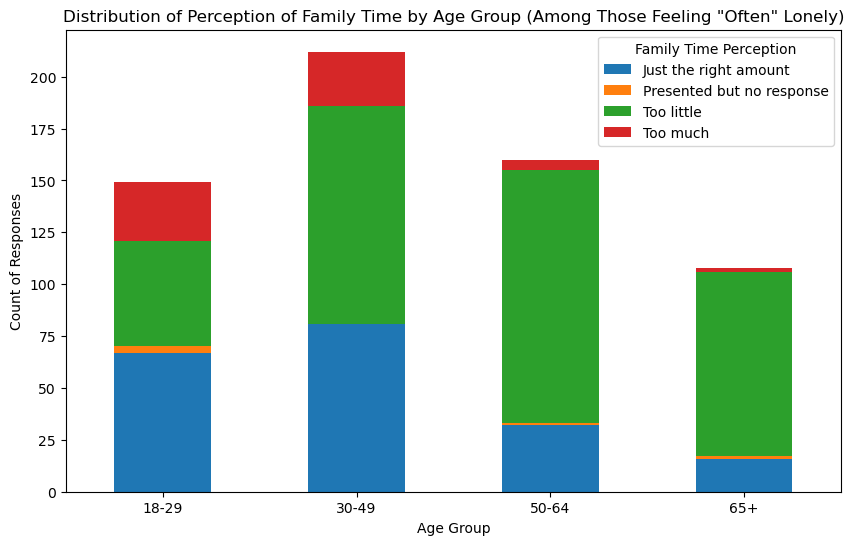

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Load and clean the data
data = pd.read_csv('https://raw.githubusercontent.com/pointOfive/stat130chat130/refs/heads/main/CP/CSCS_data_anon.csv', low_memory=False)

# Drop rows with missing values in the relevant columns
data = data.dropna(subset=['DEMO_age', 'LIFESTYLE_time_use_balance_family', 'LONELY_ucla_loneliness_scale_isolated'])

# Filter for those who feel lonely "often"
filtered_data = data[data['LONELY_ucla_loneliness_scale_isolated'] == 'Often']

# Step 1: Group data by age and perception of family time
age_groups = pd.cut(filtered_data['DEMO_age'], bins=[18, 29, 49, 64, 100], labels=['18-29', '30-49', '50-64', '65+'])
filtered_data['age_group'] = age_groups

# Step 2: Create a contingency table to show the counts of "Too Little" vs other categories by age group
contingency_table = pd.crosstab(filtered_data['age_group'], filtered_data['LIFESTYLE_time_use_balance_family'])

# Step 3: Perform Chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies:\n{expected}")

# Step 4: Plot the contingency table as a bar plot for visualization
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Perception of Family Time by Age Group (Among Those Feeling "Often" Lonely)')
plt.xlabel('Age Group')
plt.ylabel('Count of Responses')
plt.xticks(rotation=0)
plt.legend(title='Family Time Perception', loc='upper right')
plt.show()
